# Analysis of laptops technical specifications

## The main purpose:

The main purpose of this analysis is to explore and understand the relationship between different technical specifications of laptops and their market prices. Specifically, the analysis focuses on identifying the most influential factors that drive laptop prices, such as RAM size, CPU and GPU manufacturers, and screen resolution. 

The goal is to provide insights into how these features correlate with price, allowing potential buyers and manufacturers to make data-driven decisions.

**Data description of *laptops_specifications.csv*:**
* **Company**: Laptop manufacturer
* **Product**: Brand and Model
* **TypeName** Type (Notebook, Ultrabook, Gaming, etc.)
* **Inches** Screen size
* **ScreenResolution** Screen Resolution
* **CPU_Company** CPU Manufacturer
* **CPU_Type** CPU Type
* **CPU_Frequency (GHz)** CPU frequency in GHz
* **RAM (GB)** Laptop RAM
* **Memory** Hard disk/SSD memory
* **GPU_Company** GPU manufacturer
* **GPU_Type** GPU Type
* **OpSys** Operating System
* **Weight (kg)** Laptop weight (kg)
* **Price (Euro)** Laptop price (EUR)

## Stages of analysis
[1. Data importing](#Stage-1.-Data-importing)  
[2. Data processing](#Stage-2.-Data-processing)  
[3. Exploratory data analysis](#Stage-3.-Exploratory-data-analysis)   
[4. Testing hypotheses](#Stage-4.-Testing-hypotheses)  
[5. Research results](#Stage-5.-Research-results)  


## Stage 1. Data importing

Starting with importing all the required libraries:

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression

Now let's read *laptops_specifications.csv* file and save it in df variable

In [2]:
df = pd.read_csv('datasets/laptops_specifications.csv')

And print first 10 lines of the table

In [3]:
df.head(10)

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60
5,Acer,Aspire 3,Notebook,15.6,1366x768,AMD,A9-Series 9420,3.0,4,500GB HDD,AMD,Radeon R5,Windows 10,2.10,400.00
6,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.2,16,256GB Flash Storage,Intel,Iris Pro Graphics,Mac OS X,2.04,2139.97
7,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,256GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,1158.70
8,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,Intel,Core i7 8550U,1.8,16,512GB SSD,Nvidia,GeForce MX150,Windows 10,1.30,1495.00
9,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel,Core i5 8250U,1.6,8,256GB SSD,Intel,UHD Graphics 620,Windows 10,1.60,770.00


Let's see what data types we have:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1275 non-null   object 
 1   Product              1275 non-null   object 
 2   TypeName             1275 non-null   object 
 3   Inches               1275 non-null   float64
 4   ScreenResolution     1275 non-null   object 
 5   CPU_Company          1275 non-null   object 
 6   CPU_Type             1275 non-null   object 
 7   CPU_Frequency (GHz)  1275 non-null   float64
 8   RAM (GB)             1275 non-null   int64  
 9   Memory               1275 non-null   object 
 10  GPU_Company          1275 non-null   object 
 11  GPU_Type             1275 non-null   object 
 12  OpSys                1275 non-null   object 
 13  Weight (kg)          1275 non-null   float64
 14  Price (Euro)         1275 non-null   float64
dtypes: float64(4), int64(1), object(10)
me

We have 15 columns in general. There are 3 data types: non-null int64(1 column), non-null float64(4 columns) and non-null object(10 columns)

**Conclusion**

Each column contains specific information about different data.  
For now we have check if we have:
* Missing data
* Outliners

## Stage 1. Data importing

Let`s check if we have duplicates:

In [5]:
df.duplicated().sum()

0

Now we'll check if we have  missing data:

In [6]:
for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(percent_missing*100)))

Company - 0%
Product - 0%
TypeName - 0%
Inches - 0%
ScreenResolution - 0%
CPU_Company - 0%
CPU_Type - 0%
CPU_Frequency (GHz) - 0%
RAM (GB) - 0%
Memory - 0%
GPU_Company - 0%
GPU_Type - 0%
OpSys - 0%
Weight (kg) - 0%
Price (Euro) - 0%


**Handling data in column 'Inches'**

Let's check if we have outliners:

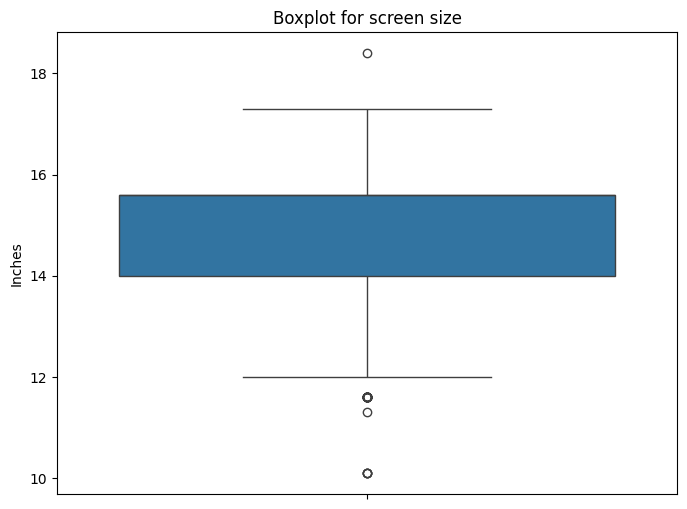

In [7]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Inches'])
plt.title('Boxplot for screen size')
plt.ylabel('Inches')
plt.show()

We have outliners which we can be removed by using interquartile range method:

In [8]:
Q1 = df['Inches'].quantile(0.25)
Q3 = df['Inches'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Inches'] >= lower_bound) & (df['Inches'] <= upper_bound)]

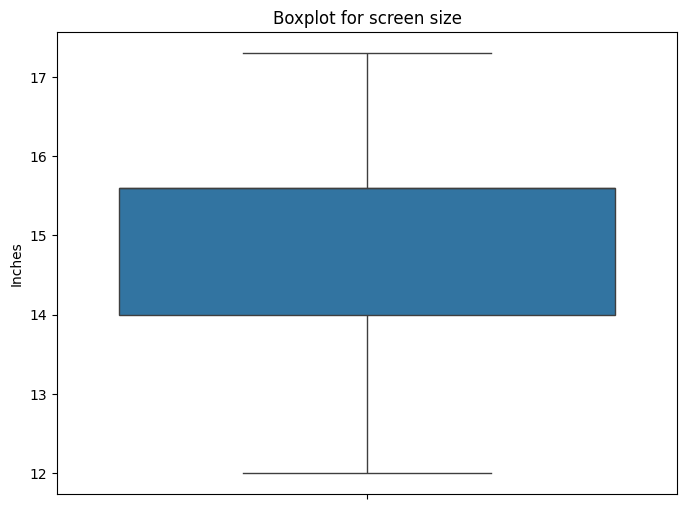

In [9]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Inches'])
plt.title('Boxplot for screen size')
plt.ylabel('Inches')
plt.show()

**Handling missing data in column 'CPU_Frequency (GHz)'**

Let's see if we have outliners in CPU_Frequency (GHz):

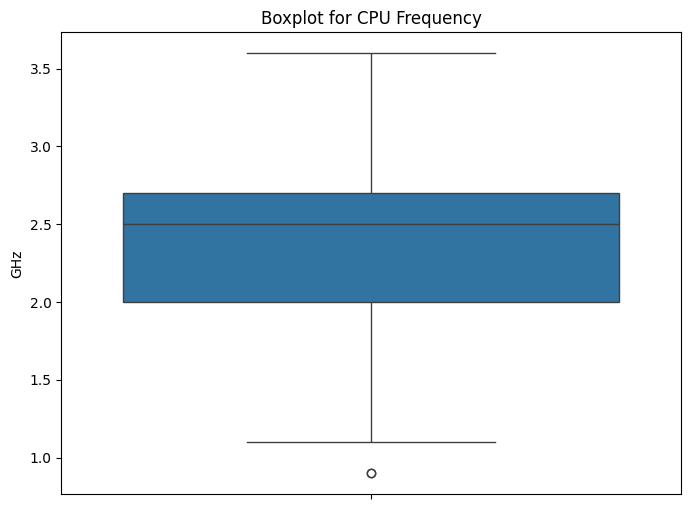

In [10]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['CPU_Frequency (GHz)'])
plt.title('Boxplot for CPU Frequency')
plt.ylabel('GHz')
plt.show()

Let's remove the outliners with IQR:

In [11]:
Q1 = df['CPU_Frequency (GHz)'].quantile(0.25)
Q3 = df['CPU_Frequency (GHz)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['CPU_Frequency (GHz)'] >= lower_bound) & (df['CPU_Frequency (GHz)'] <= upper_bound)]

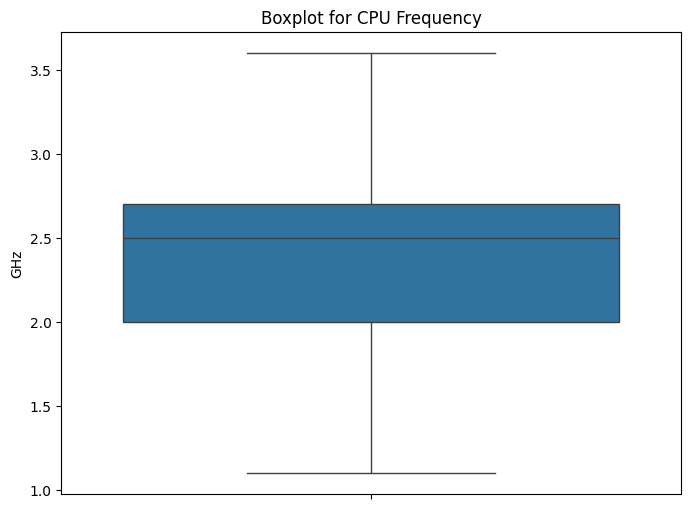

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['CPU_Frequency (GHz)'])
plt.title('Boxplot for CPU Frequency')
plt.ylabel('GHz')
plt.show()

**Handling data in 'Weight (kg)'**

Let's check if we have outliners in Weight (kg) column:

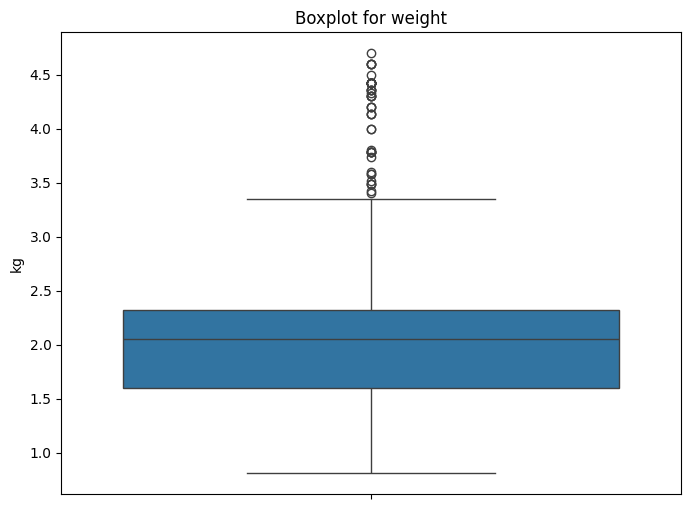

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Weight (kg)'])
plt.title('Boxplot for weight')
plt.ylabel('kg')
plt.show()

Let's remove the outliners by IQR: 

In [14]:
Q1 = df['Weight (kg)'].quantile(0.25)
Q3 = df['Weight (kg)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Weight (kg)'] >= lower_bound) & (df['Weight (kg)'] <= upper_bound)]

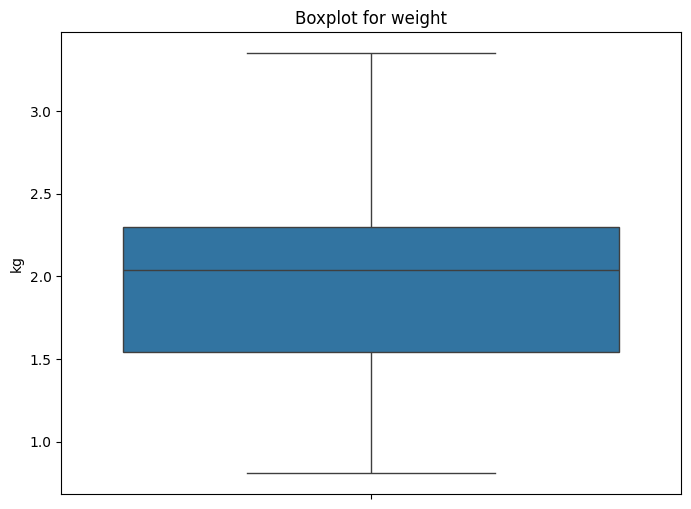

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Weight (kg)'])
plt.title('Boxplot for weight')
plt.ylabel('kg')
plt.show()

**Handling missing data in column 'Price (Euro)'**

Let's check if we have outliners in Price:

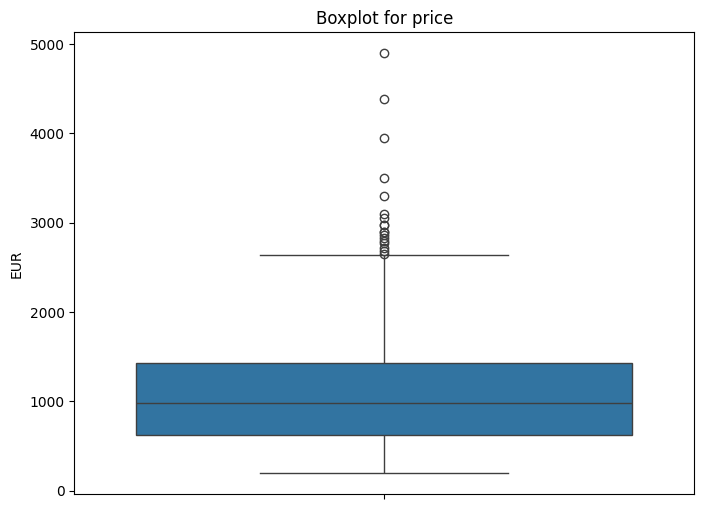

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Price (Euro)'])
plt.title('Boxplot for price')
plt.ylabel('EUR')
plt.show()

Let's remove outliners with IQR:

In [17]:
Q1 = df['Price (Euro)'].quantile(0.25)
Q3 = df['Price (Euro)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Price (Euro)'] >= lower_bound) & (df['Price (Euro)'] <= upper_bound)]

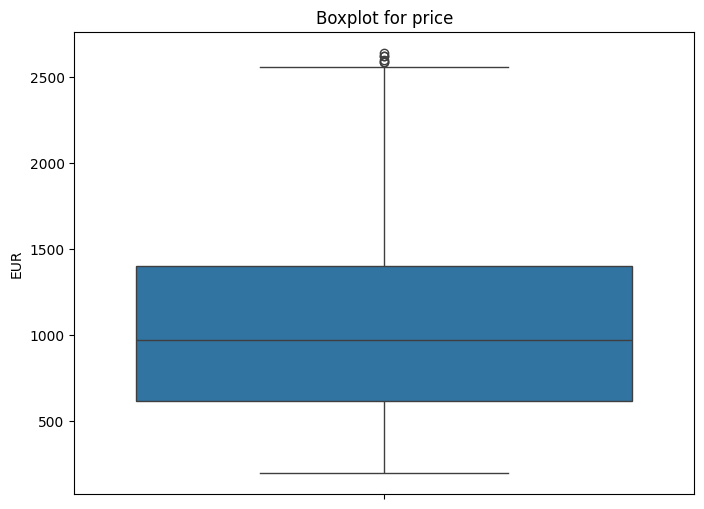

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Price (Euro)'])
plt.title('Boxplot for price')
plt.ylabel('EUR')
plt.show()

**Conclusion** 

During the data processing stage, I checked if that we have no duplicates and missing data. Also i improved data accuracy by removing the outliners

## Stage 3. Exploratory data analysis

**Which factors have the most influence on laprop price?**

Firstly, let's update all the columns to numeric values, so we can show the correlation between all the variables and not only the ones with numerical values. This will help us to understand which variables are strongly or weakly correlated with each other.

In [19]:
df_numerized = df.copy()

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,1,273,4,13.3,23,1,35,2.3,8,4,2,49,7,1.37,1339.69
1,1,274,4,13.3,1,1,35,1.8,8,2,2,43,7,1.34,898.94
2,7,50,3,15.6,8,1,41,2.5,8,14,2,45,3,1.86,575.00
3,1,273,4,15.4,25,1,49,2.7,16,26,0,66,7,1.83,2537.45
4,1,273,4,13.3,23,1,35,3.1,8,14,2,50,7,1.37,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,10,519,0,14.0,13,1,50,2.5,4,4,2,39,4,1.80,638.00
1271,10,526,0,13.3,19,1,50,2.5,16,26,2,39,4,1.30,1499.00
1272,10,176,3,14.0,0,1,19,1.6,2,31,2,32,4,1.50,229.00
1273,7,2,3,15.6,0,1,50,2.5,6,10,0,77,4,2.19,764.00


Now we can build the correlation matrix and visualize the data:

In [20]:
corr_mat = df_numerized.corr()

corr_pairs = corr_mat.unstack()

sorted_pairs = corr_pairs.sort_values()

high_corr = sorted_pairs[(sorted_pairs) > 0.5]  

high_corr

Price (Euro)         RAM (GB)               0.680501
RAM (GB)             Price (Euro)           0.680501
Inches               Weight (kg)            0.868886
Weight (kg)          Inches                 0.868886
Company              Company                1.000000
CPU_Frequency (GHz)  CPU_Frequency (GHz)    1.000000
OpSys                OpSys                  1.000000
GPU_Type             GPU_Type               1.000000
GPU_Company          GPU_Company            1.000000
Memory               Memory                 1.000000
RAM (GB)             RAM (GB)               1.000000
CPU_Type             CPU_Type               1.000000
CPU_Company          CPU_Company            1.000000
ScreenResolution     ScreenResolution       1.000000
Inches               Inches                 1.000000
TypeName             TypeName               1.000000
Product              Product                1.000000
Weight (kg)          Weight (kg)            1.000000
Price (Euro)         Price (Euro)           1.

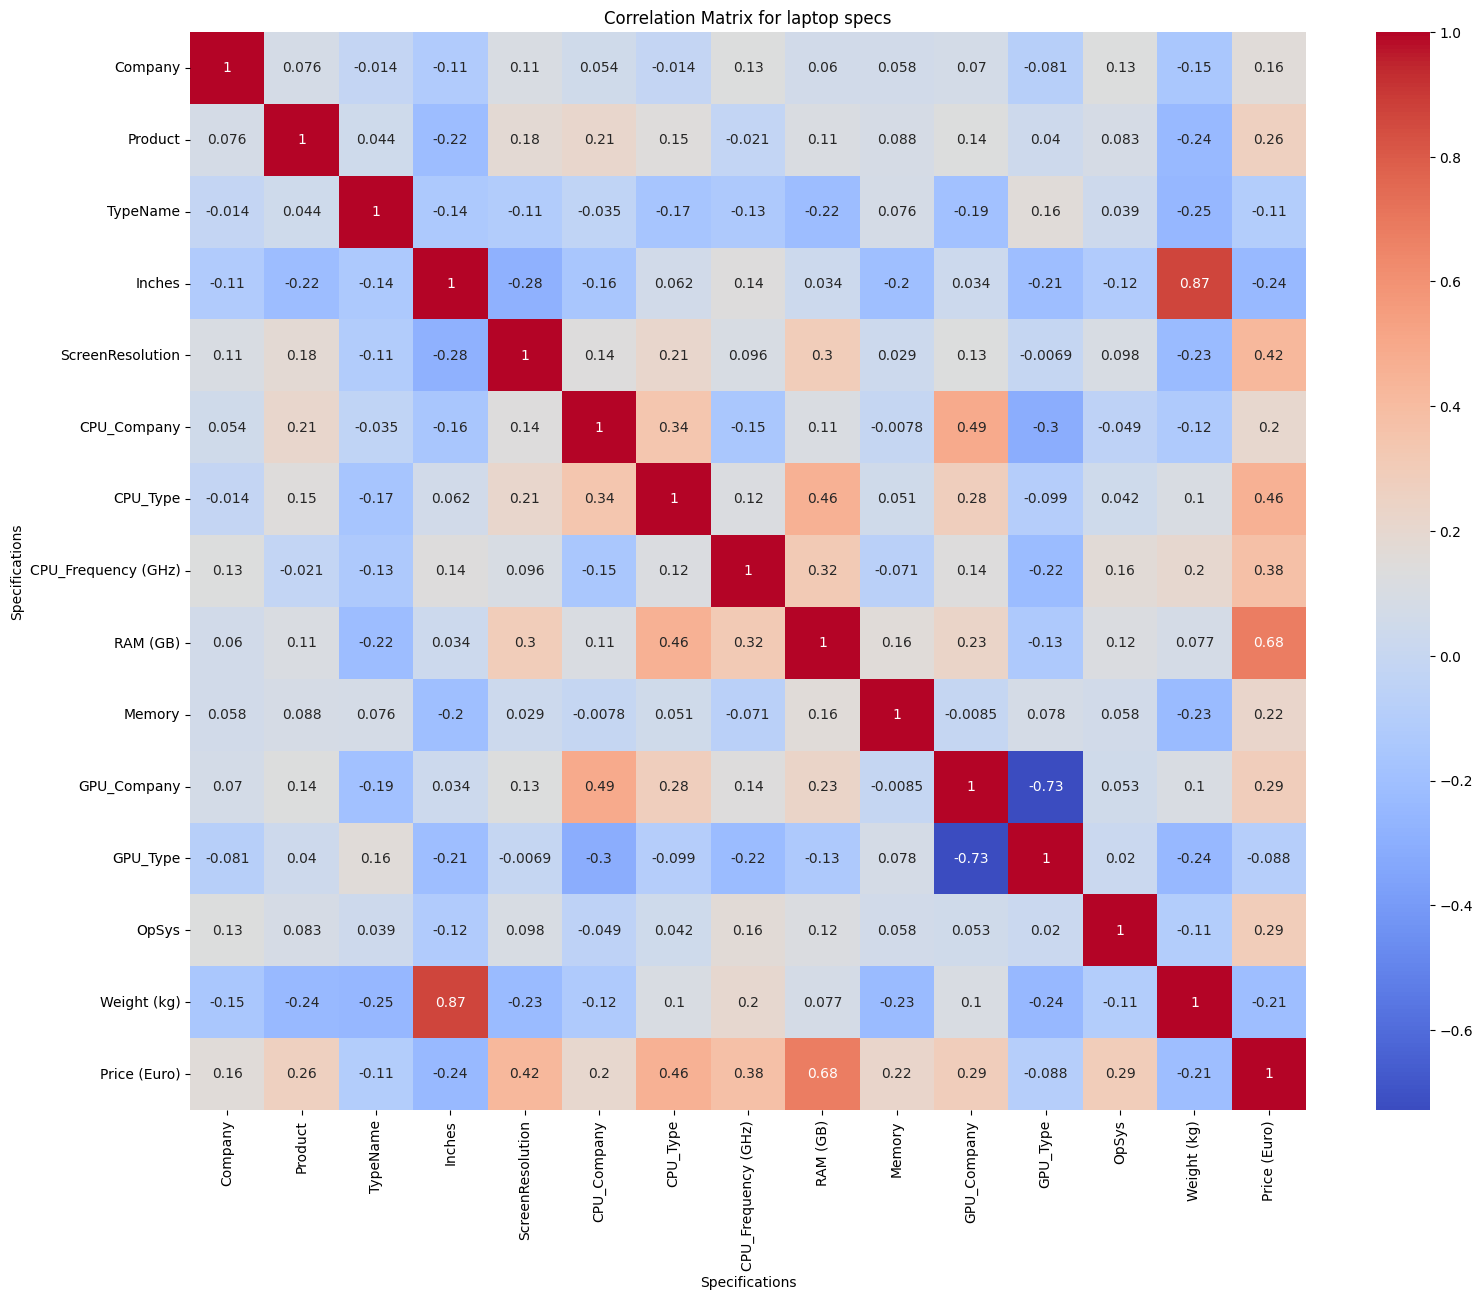

In [21]:
plt.figure(figsize=(18, 14))

correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix for laptop specs")
plt.xlabel("Specifications")
plt.ylabel("Specifications")
plt.show()

**Conclusion**

The factors that have the most influence the price are RAM, ScreenResolution and CPU_Type. The most descending influence has inches.

**Which laptop manufacturer is the most expensive? Most popular in a mid-price**

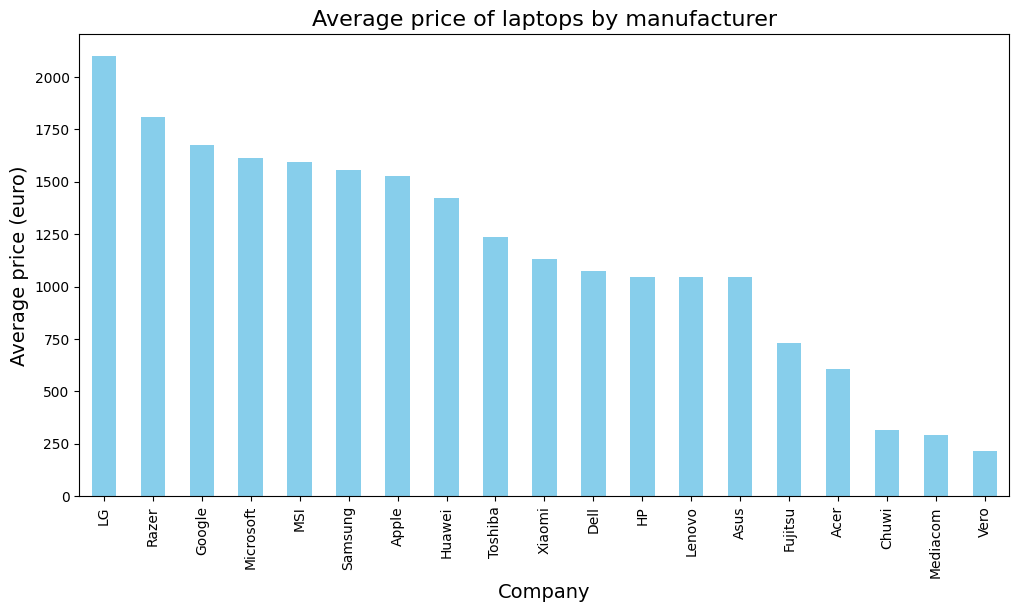

In [34]:
mean_prices = df_clean.groupby('Company')['Price (Euro)'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
mean_prices.plot(kind='bar', color='skyblue')

plt.title('Average price of laptops by manufacturer', fontsize=16)
plt.xlabel('Company', fontsize=14)
plt.ylabel('Average price (euro)', fontsize=14)

plt.show()


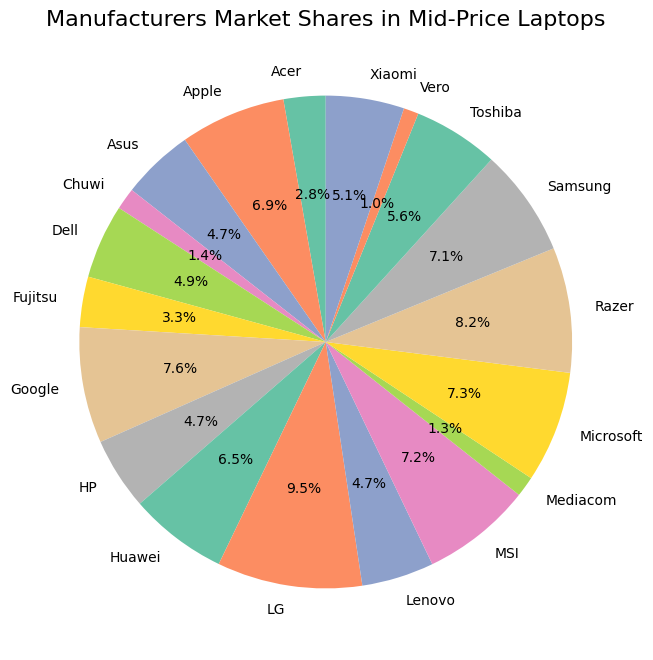

In [37]:
mean_prices = df_clean.groupby('Company')['Price (Euro)'].mean()

plt.figure(figsize=(8, 8))
plt.pie(mean_prices, labels=mean_prices.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))

plt.title('Manufacturers Market Shares in Mid-Price Laptops', fontsize=16)

plt.show()


**Conclusion**

The biggets avarage price of a laptop are from LG

**Analysis of laptop weights by type**

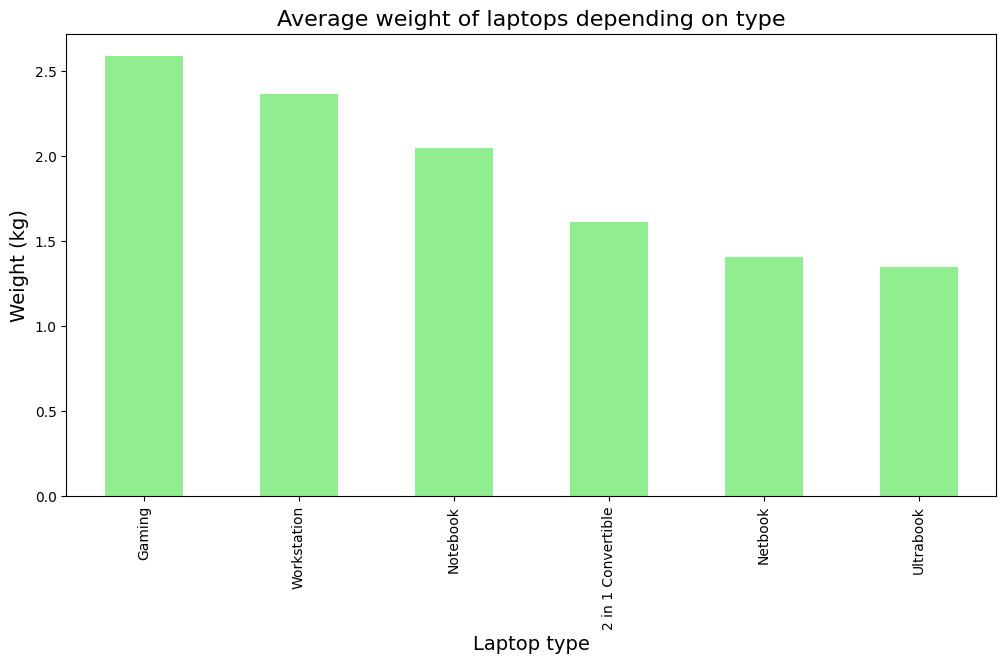

In [42]:
mean_weights = df.groupby('TypeName')['Weight (kg)'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
mean_weights.plot(kind='bar', color='lightgreen')

plt.title('Average weight of laptops depending on type', fontsize=16)
plt.xlabel('Laptop type', fontsize=14)
plt.ylabel('Weight (kg)', fontsize=14)

plt.show()


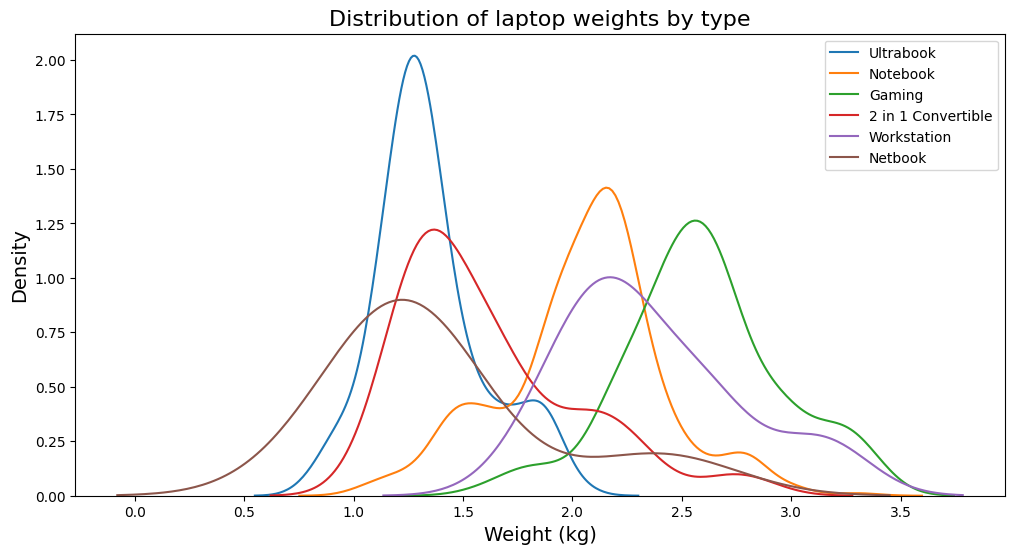

In [43]:
plt.figure(figsize=(12, 6))

for type_name in df['TypeName'].unique():
    sns.kdeplot(df[df['TypeName'] == type_name]['Weight (kg)'], label=type_name)

plt.title('Distribution of laptop weights by type', fontsize=16)
plt.xlabel('Weight (kg)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend()
plt.show()


**Conclusion** 

The lightest laptops types are ultrabook, the heaviest are gaming laptops 

**Price dependence on GPU/CPU**

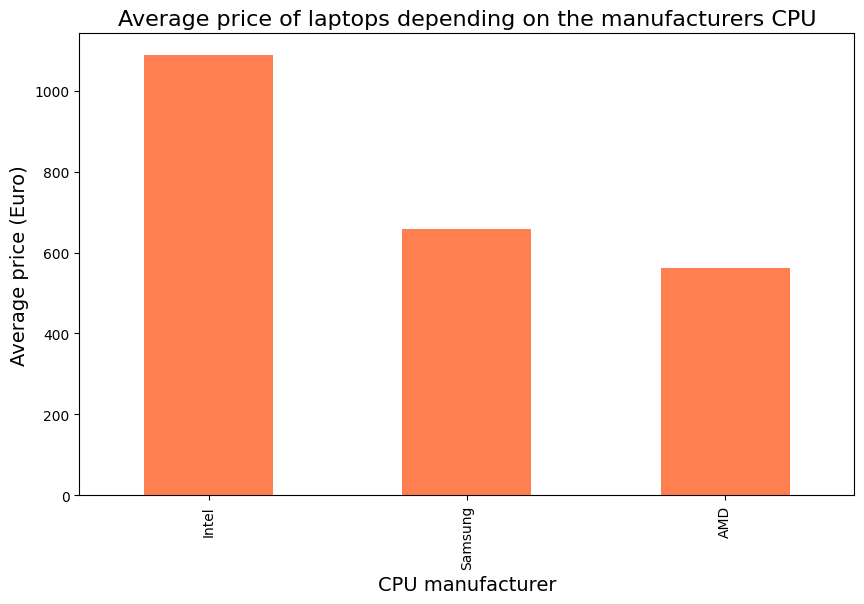

In [46]:
mean_cpu_prices = df.groupby('CPU_Company')['Price (Euro)'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
mean_cpu_prices.plot(kind='bar', color='coral')

plt.title('Average price of laptops depending on the manufacturers CPU', fontsize=16)
plt.xlabel('CPU manufacturer', fontsize=14)
plt.ylabel('Average price (Euro)', fontsize=14)
plt.show()


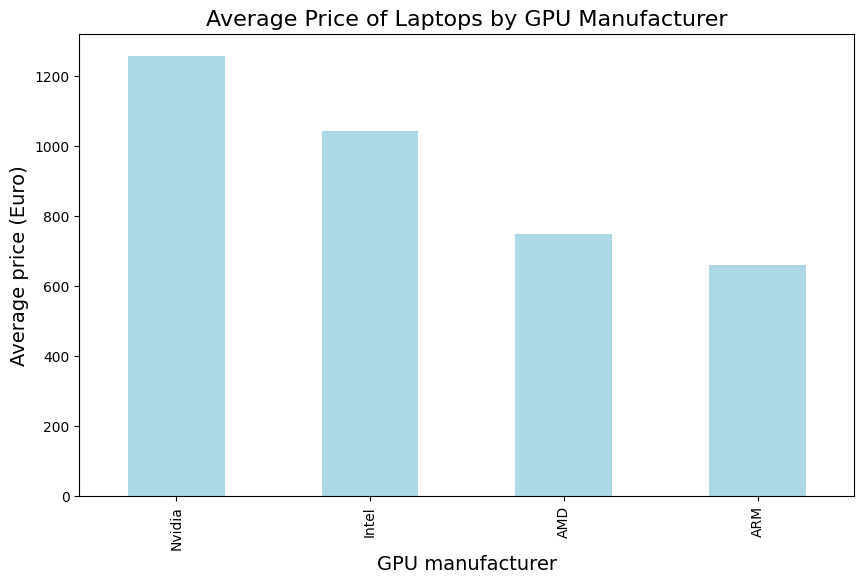

In [47]:
mean_gpu_prices = df.groupby('GPU_Company')['Price (Euro)'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
mean_gpu_prices.plot(kind='bar', color='lightblue')

plt.title('Average Price of Laptops by GPU Manufacturer', fontsize=16)
plt.xlabel('GPU manufacturer', fontsize=14)
plt.ylabel('Average price (Euro)', fontsize=14)
plt.show()


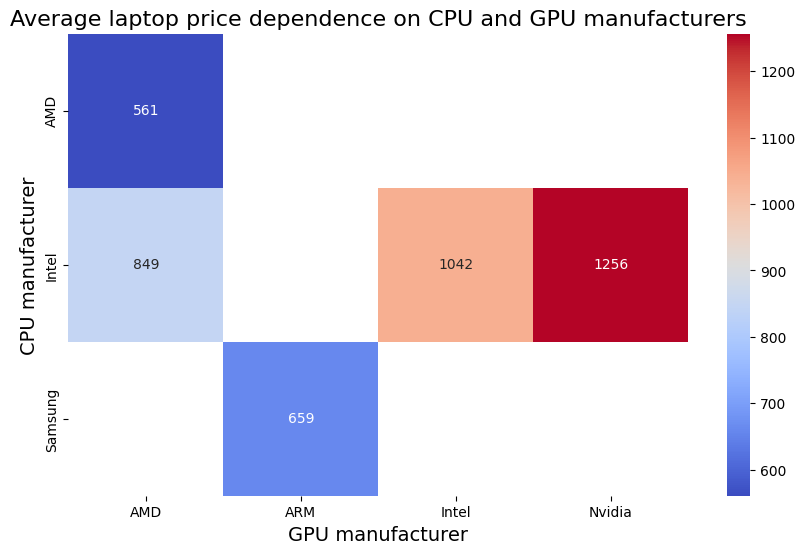

In [49]:
mean_combo_prices = df.groupby(['CPU_Company', 'GPU_Company'])['Price (Euro)'].mean().unstack()

plt.figure(figsize=(10, 6))
sns.heatmap(mean_combo_prices, annot=True, cmap='coolwarm', fmt='.0f')

plt.title('Average laptop price dependence on CPU and GPU manufacturers', fontsize=16)
plt.xlabel('GPU manufacturer', fontsize=14)
plt.ylabel('CPU manufacturer', fontsize=14)

plt.show()


**Conclusion**

The most expensive combination is Nvidia+Intel. The cheapest combination is AMD+AMD

## Stage 4. Testing hypotheses

**Testing Hypothesis #1. Hypothesis comparing the Prices of Gaming vs. Non-Gaming Laptops**

Null Hypothesis (H0): There is no significant difference in the mean prices of Gaming laptops and Non-Gaming laptops.  
Alternative Hypothesis (H1): There is a significant difference in the mean prices of Gaming laptops and Non-Gaming laptops.

In [59]:
gaming_laptops = df[df['TypeName'] == 'Gaming']
non_gaming_laptops = df[df['TypeName'] != 'Gaming']

gaming_prices = gaming_laptops['Price (Euro)']
non_gaming_prices = non_gaming_laptops['Price (Euro)']

t_stat, p_value = stats.ttest_ind(gaming_prices, non_gaming_prices, equal_var=False)

print("Comparing Prices of Gaming vs. Non-Gaming Laptops")
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in mean prices.")
else:
    print("Fail to reject the null hypothesis: No significant difference in mean prices.")

Comparing Prices of Gaming vs. Non-Gaming Laptops
T-Statistic: 10.043982482948044
P-Value: 6.371854926295058e-20
Reject the null hypothesis: There is a significant difference in mean prices.


**Testing Hypothesis #2. Hypothesis impact of CPU Frequency on Laptop Price**

Null Hypothesis (H0): There is no significant correlation between CPU frequency and laptop price.  
Alternative Hypothesis (H1): There is a significant correlation between CPU frequency and laptop price.

In [66]:
threshold = df['CPU_Frequency (GHz)'].median()

low_cpu_laptops = df[df['CPU_Frequency (GHz)'] <= threshold]
high_cpu_laptops = df[df['CPU_Frequency (GHz)'] > threshold]

low_cpu_prices = low_cpu_laptops['Price (Euro)']
high_cpu_prices = high_cpu_laptops['Price (Euro)']

t_stat, p_value = stats.ttest_ind(low_cpu_prices, high_cpu_prices, equal_var=False)

print("Comparing Prices of Laptops with Low vs. High CPU Frequency")
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in mean prices.")
else:
    print("Fail to reject the null hypothesis: No significant difference in mean prices.")


Comparing Prices of Laptops with Low vs. High CPU Frequency
T-Statistic: -16.096965786958073
P-Value: 2.1785507161085353e-49
Reject the null hypothesis: There is a significant difference in mean prices.


## Stage 5. Research results

**Working hypotheses**

* Comparing the Prices of Gaming vs. Non-Gaming Laptops;
* Impact of CPU Frequency on Laptop Price.

**General conclusions**

* Influential Factors: RAM, screen resolution, and CPU type significantly influence laptop prices. Higher RAM and better screen resolutions typically result in higher prices.
* Manufacturer Trends: Laptops from LG have the highest average price. Ultrabooks are the lightest, while gaming laptops are the heaviest.
* CPU/GPU Impact: Laptops with Nvidia and Intel components tend to be the most expensive, whereas AMD combinations offer more budget-friendly options.

**General recommendations**

* For Consumers: If budget is a concern, opting for AMD-based laptops or devices with lower RAM and resolution may provide cost-effective options without compromising essential functionality.
* For Manufacturers: Focus on offering mid-range laptops with balanced specifications to attract a wider market segment.
